In [133]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [134]:
df = pd.read_excel('/Users/asifmahdin/Downloads/mortality_2019_clean.xlsx')
#df.dropna(subset=['Unnamed: 1'], inplace=True)
#df = df.fillna(0)
df = df.replace(".", 0)
df = df.reset_index(drop = True)
df = df.drop(columns='GHE cause')
df

,Unnamed: 1,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
0,NaN,38042.000000,2881.000000,43053.000000,31825.000000,97.000000,44781.000000,2958.000000,25203.000000,8955.000000,...,58005.000000,329065.000000,3462.000000,32982.000000,300.000000,28516.000000,96462.000000,29162.000000,17861.000000,14645.000000
1,NaN,254.809910,31.154185,203.300382,228.819281,0.651185,348.916423,25.404016,164.535647,84.971439,...,321.676117,2949.213916,34.806360,170.280825,2.133345,172.089954,727.941166,170.039100,121.104859,117.709802
2,NaN,83.910054,0.941825,26.397358,135.374688,0.064040,61.397059,1.700672,8.129796,3.033462,...,174.789115,156.369086,2.490147,13.977188,0.359619,26.780209,67.734497,51.259295,68.445866,56.085543
3,Infectious and parasitic diseases,28.908938,0.124680,5.431372,72.403294,0.030165,15.005384,0.254799,2.813597,1.131932,...,98.925744,73.441804,0.799736,3.737703,0.134640,12.649732,26.273970,16.132111,42.295751,31.549055
4,Respiratory Infectious,14.659211,0.645985,7.290880,25.035302,0.023675,40.999800,1.218216,4.469247,1.590467,...,26.343524,60.580688,1.376829,4.849624,0.124366,7.190808,27.870731,11.983311,9.589533,10.847826
5,Maternal conditions,7.806885,0.001975,0.916694,3.267900,0.000433,0.278768,0.008491,0.020311,0.004056,...,6.834999,0.778604,0.008908,0.215390,0.014115,0.422176,0.773028,0.889804,1.187941,1.749061
6,Neonatal conditions,31.919039,0.164791,12.656338,31.044148,0.003271,3.386773,0.209240,0.531271,0.118522,...,36.911160,11.343721,0.128391,5.134119,0.076289,5.742914,11.494572,21.121099,13.001028,9.516352
7,Nutritional deficiencies,0.615982,0.004394,0.102073,3.624045,0.006497,1.726335,0.009926,0.295369,0.188486,...,5.773691,10.224267,0.176283,0.040352,0.010211,0.774578,1.322196,1.132969,2.371613,2.423249
8,NaN,126.847138,29.266520,161.330138,72.648841,0.552158,267.599575,22.515008,146.624878,77.311013,...,110.595909,2599.584031,29.762925,145.048644,1.577087,111.957767,592.300765,85.634576,42.135265,46.210782
9,Malignant neoplasms,15.564909,4.649068,30.348779,10.448573,0.134942,66.078560,5.104512,47.616788,21.703473,...,26.472998,617.651394,8.853269,16.652382,0.145647,25.998761,115.762381,9.210174,7.039447,10.876233


In [135]:
rate_df = df.iloc[:, 1:].div(df.iloc[0, 1:], axis=1) * 1000
rate_df

,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,...,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
1,6.698121,10.813671,4.722096,7.189922,6.71325,7.791617,8.588241,6.528415,9.488715,8.178528,...,5.545662,8.962405,10.05383,5.162841,7.11115,6.034856,7.546403,5.830845,6.780408,8.037542
2,2.205721,0.326909,0.613136,4.253722,0.660208,1.371052,0.57494,0.322573,0.338745,0.489746,...,3.013346,0.475192,0.71928,0.423782,1.19873,0.939129,0.702188,1.757743,3.832141,3.829672
3,0.759922,0.043277,0.126155,2.275045,0.310974,0.335084,0.086139,0.111637,0.126402,0.159897,...,1.705469,0.223183,0.231004,0.113326,0.448799,0.443601,0.272376,0.553189,2.368051,2.154254
4,0.385343,0.224222,0.169347,0.786655,0.244071,0.915562,0.411838,0.17733,0.177607,0.178952,...,0.45416,0.184099,0.397698,0.147038,0.414552,0.252167,0.28893,0.410922,0.536898,0.740719
5,0.205218,0.000686,0.021292,0.102683,0.004461,0.006225,0.00287,0.000806,0.000453,0.004902,...,0.117835,0.002366,0.002573,0.006531,0.047048,0.014805,0.008014,0.030512,0.06651,0.119431
6,0.839047,0.057199,0.293971,0.975464,0.033721,0.07563,0.070737,0.02108,0.013235,0.143036,...,0.636344,0.034473,0.037086,0.155664,0.254296,0.201393,0.119162,0.724268,0.7279,0.649802
7,0.016192,0.001525,0.002371,0.113874,0.066979,0.038551,0.003355,0.01172,0.021048,0.002959,...,0.099538,0.031071,0.050919,0.001223,0.034035,0.027163,0.013707,0.038851,0.132782,0.165466
8,3.334397,10.158459,3.747245,2.28276,5.692354,5.975739,7.611565,5.817755,8.633279,7.380972,...,1.906662,7.89991,8.597032,4.397812,5.256957,3.926139,6.14025,2.936512,2.359065,3.155397
9,0.409151,1.6137,0.704917,0.328313,1.391153,1.475594,1.725663,1.88933,2.423615,0.82707,...,0.456392,1.876989,2.55727,0.504893,0.48549,0.911725,1.200083,0.315828,0.394124,0.742658


In [136]:
df_combined = pd.concat([df.iloc[:, :1], rate_df], axis=1)

In [137]:
df_combined

,Unnamed: 1,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
0,NaN,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,...,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
1,NaN,6.698121,10.813671,4.722096,7.189922,6.71325,7.791617,8.588241,6.528415,9.488715,...,5.545662,8.962405,10.05383,5.162841,7.11115,6.034856,7.546403,5.830845,6.780408,8.037542
2,NaN,2.205721,0.326909,0.613136,4.253722,0.660208,1.371052,0.57494,0.322573,0.338745,...,3.013346,0.475192,0.71928,0.423782,1.19873,0.939129,0.702188,1.757743,3.832141,3.829672
3,Infectious and parasitic diseases,0.759922,0.043277,0.126155,2.275045,0.310974,0.335084,0.086139,0.111637,0.126402,...,1.705469,0.223183,0.231004,0.113326,0.448799,0.443601,0.272376,0.553189,2.368051,2.154254
4,Respiratory Infectious,0.385343,0.224222,0.169347,0.786655,0.244071,0.915562,0.411838,0.17733,0.177607,...,0.45416,0.184099,0.397698,0.147038,0.414552,0.252167,0.28893,0.410922,0.536898,0.740719
5,Maternal conditions,0.205218,0.000686,0.021292,0.102683,0.004461,0.006225,0.00287,0.000806,0.000453,...,0.117835,0.002366,0.002573,0.006531,0.047048,0.014805,0.008014,0.030512,0.06651,0.119431
6,Neonatal conditions,0.839047,0.057199,0.293971,0.975464,0.033721,0.07563,0.070737,0.02108,0.013235,...,0.636344,0.034473,0.037086,0.155664,0.254296,0.201393,0.119162,0.724268,0.7279,0.649802
7,Nutritional deficiencies,0.016192,0.001525,0.002371,0.113874,0.066979,0.038551,0.003355,0.01172,0.021048,...,0.099538,0.031071,0.050919,0.001223,0.034035,0.027163,0.013707,0.038851,0.132782,0.165466
8,NaN,3.334397,10.158459,3.747245,2.28276,5.692354,5.975739,7.611565,5.817755,8.633279,...,1.906662,7.89991,8.597032,4.397812,5.256957,3.926139,6.14025,2.936512,2.359065,3.155397
9,Malignant neoplasms,0.409151,1.6137,0.704917,0.328313,1.391153,1.475594,1.725663,1.88933,2.423615,...,0.456392,1.876989,2.55727,0.504893,0.48549,0.911725,1.200083,0.315828,0.394124,0.742658


In [138]:
df_combined.dropna(subset=['Unnamed: 1'], inplace=True)
df_combined = df_combined.fillna(0)

In [139]:
df_combined = df_combined.reset_index(drop = True)
df_combined

,Unnamed: 1,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
0,Infectious and parasitic diseases,0.759922,0.043277,0.126155,2.275045,0.310974,0.335084,0.086139,0.111637,0.126402,...,1.705469,0.223183,0.231004,0.113326,0.448799,0.443601,0.272376,0.553189,2.368051,2.154254
1,Respiratory Infectious,0.385343,0.224222,0.169347,0.786655,0.244071,0.915562,0.411838,0.177330,0.177607,...,0.454160,0.184099,0.397698,0.147038,0.414552,0.252167,0.288930,0.410922,0.536898,0.740719
2,Maternal conditions,0.205218,0.000686,0.021292,0.102683,0.004461,0.006225,0.002870,0.000806,0.000453,...,0.117835,0.002366,0.002573,0.006531,0.047048,0.014805,0.008014,0.030512,0.066510,0.119431
3,Neonatal conditions,0.839047,0.057199,0.293971,0.975464,0.033721,0.075630,0.070737,0.021080,0.013235,...,0.636344,0.034473,0.037086,0.155664,0.254296,0.201393,0.119162,0.724268,0.727900,0.649802
4,Nutritional deficiencies,0.016192,0.001525,0.002371,0.113874,0.066979,0.038551,0.003355,0.011720,0.021048,...,0.099538,0.031071,0.050919,0.001223,0.034035,0.027163,0.013707,0.038851,0.132782,0.165466
5,Malignant neoplasms,0.409151,1.613700,0.704917,0.328313,1.391153,1.475594,1.725663,1.889330,2.423615,...,0.456392,1.876989,2.557270,0.504893,0.485490,0.911725,1.200083,0.315828,0.394124,0.742658
6,Other neoplasms,0.000755,0.006740,0.001343,0.001252,0.030788,0.071998,0.014784,0.049686,0.090940,...,0.000992,0.053920,0.133928,0.000837,0.002439,0.076007,0.003368,0.000711,0.001111,0.002540
7,Diabetes mellitus,0.151137,0.072369,0.108662,0.138658,0.568691,0.152694,0.241261,0.177407,0.233769,...,0.107692,0.186645,0.215867,0.188147,0.422862,0.391935,0.351022,0.061532,0.134092,0.228324
8,"Endocrine, blood, immune disorders",0.035852,0.031504,0.021498,0.035165,0.247708,0.089042,0.017574,0.092384,0.120307,...,0.030651,0.142783,0.140715,0.010061,0.029246,0.026648,0.021588,0.025293,0.019798,0.037791
9,Mental and substance use disorders,0.012567,0.015115,0.024730,0.013363,0.057790,0.030246,0.014305,0.089524,0.078720,...,0.011636,0.274967,0.048457,0.011444,0.014740,0.009316,0.023163,0.023696,0.014703,0.017826


In [140]:
df_combined.iloc[[0]]

,Unnamed: 1,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
0,Infectious and parasitic diseases,0.759922,0.043277,0.126155,2.275045,0.310974,0.335084,0.086139,0.111637,0.126402,...,1.705469,0.223183,0.231004,0.113326,0.448799,0.443601,0.272376,0.553189,2.368051,2.154254


In [141]:
df_combined.rename(columns={'Unnamed: 1': 'disease'}, inplace=True)

In [142]:
df_combined = df_combined.set_index('disease')

In [143]:
import pandas as pd

# Assuming `df` is your DataFrame
df_inverted = df_combined.transpose()

In [144]:
df_inverted

disease,Infectious and parasitic diseases,Respiratory Infectious,Maternal conditions,Neonatal conditions,Nutritional deficiencies,Malignant neoplasms,Other neoplasms,Diabetes mellitus,"Endocrine, blood, immune disorders",Mental and substance use disorders,...,Respiratory diseases,Digestive diseases,Genitourinary diseases,Skin diseases,Musculoskeletal diseases,Congenital anomalies,Oral conditions,Sudden infant death syndrome,Unintentional injuries,Intentional injuries
Afghanistan,0.759922,0.385343,0.205218,0.839047,0.016192,0.409151,0.000755,0.151137,0.035852,0.012567,...,0.217776,0.210819,0.177501,0.002470,0.004274,0.131452,0.0,0.011499,0.358653,0.799349
Albania,0.043277,0.224222,0.000686,0.057199,0.001525,1.613700,0.006740,0.072369,0.031504,0.015115,...,0.401005,0.228585,0.151835,0.002072,0.017435,0.035557,0.0,0.000493,0.249206,0.079096
Algeria,0.126155,0.169347,0.021292,0.293971,0.002371,0.704917,0.001343,0.108662,0.021498,0.024730,...,0.163335,0.131967,0.178771,0.002575,0.004439,0.101212,0.0,0.004663,0.319304,0.042410
Angola,2.275045,0.786655,0.102683,0.975464,0.113874,0.328313,0.001252,0.138658,0.035165,0.013363,...,0.137126,0.309818,0.109744,0.007053,0.005573,0.232599,0.0,0.014380,0.499879,0.153561
Antigua and Barbuda,0.310974,0.244071,0.004461,0.033721,0.066979,1.391153,0.030788,0.568691,0.247708,0.057790,...,0.279514,0.157479,0.358592,0.091628,0.023347,0.043890,0.0,0.001289,0.332350,0.028340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),0.443601,0.252167,0.014805,0.201393,0.027163,0.911725,0.076007,0.391935,0.026648,0.009316,...,0.233771,0.214762,0.231683,0.000617,0.016698,0.099792,0.0,0.001017,0.506731,0.662857
Viet Nam,0.272376,0.288930,0.008014,0.119162,0.013707,1.200083,0.003368,0.351022,0.021588,0.023163,...,0.467235,0.344797,0.279851,0.015708,0.007973,0.073228,0.0,0.003543,0.609956,0.094010
Yemen,0.553189,0.410922,0.030512,0.724268,0.038851,0.315828,0.000711,0.061532,0.025293,0.023696,...,0.188588,0.171196,0.094603,0.001505,0.003786,0.147138,0.0,0.013154,0.538123,0.598466
Zambia,2.368051,0.536898,0.066510,0.727900,0.132782,0.394124,0.001111,0.134092,0.019798,0.014703,...,0.120608,0.354751,0.122811,0.007045,0.004748,0.176124,0.0,0.010450,0.451349,0.137853


In [145]:
df_inverted.reset_index(inplace=True)
df_inverted.rename(columns={'index': 'disease'}, inplace=True)

In [146]:
df_inverted.reset_index(inplace=True)
df_inverted.rename_axis("", axis="columns", inplace=True)

In [147]:
df = df_inverted.drop(columns = ['index'])
df.rename(columns={'disease': 'Country'}, inplace=True)

In [148]:
df.at[179, "Country"] = "Vietnam"
df.at[178, "Country"] = "Venezuela"
df.loc[df["Country"] == "Côte d'Ivoire", "Country"] = "Ivory Coast"
df.loc[df["Country"] == "Iran (Islamic Republic of)", "Country"] = "Iran"
df.loc[df["Country"] == "United Kingdom", "Country"] = "England"
df.loc[df["Country"] == "United States of America", "Country"] = "USA"
df.loc[df["Country"] == "Russian Federation", "Country"] = "Russia"
df.loc[df["Country"] == "Democratic People's Republic of Korea", "Country"] = "North Korea"
df.loc[df["Country"] == "Republic of Korea", "Country"] = "South Korea"
df.loc[df["Country"] == "Congo", "Country"] = "Republic of the Congo"
df = df[['Country', 'Infectious and parasitic diseases']]
df

,Country,Infectious and parasitic diseases
0,Afghanistan,0.759922
1,Albania,0.043277
2,Algeria,0.126155
3,Angola,2.275045
4,Antigua and Barbuda,0.310974
...,...,...
178,Venezuela,0.443601
179,Vietnam,0.272376
180,Yemen,0.553189
181,Zambia,2.368051


In [149]:
df['Country'].values

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Republic of the Congo', 'Costa Rica',
       'Ivory Coast', 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'North Korea', 'Democratic Republic of the Congo', 'Denmark',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada',
   

In [150]:
df

,Country,Infectious and parasitic diseases
0,Afghanistan,0.759922
1,Albania,0.043277
2,Algeria,0.126155
3,Angola,2.275045
4,Antigua and Barbuda,0.310974
...,...,...
178,Venezuela,0.443601
179,Vietnam,0.272376
180,Yemen,0.553189
181,Zambia,2.368051


In [151]:
# add new property for easier chloropleth.
with open('/Users/asifmahdin/Downloads/Assignment-4/world.json', 'r') as file:
    json_data = json.load(file)


population_dict = dict(zip(df['Country'], df['Infectious and parasitic diseases']))

for feature in json_data['features']:
    country_name = feature['properties']['name']

    if country_name in population_dict:
        population = population_dict[country_name]
    else:
        population = 0
    
    feature['properties']['population'] = population


with open('/Users/asifmahdin/Downloads/Assignment-4/updated_data.json', 'w') as file:
    json.dump(json_data, file)


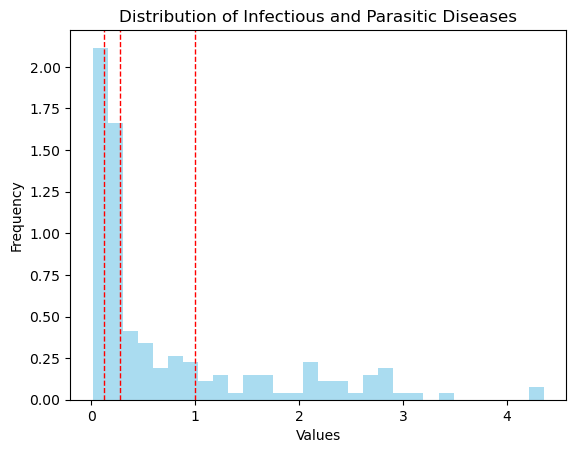

In [152]:
plt.hist(df['Infectious and parasitic diseases'], bins=30, density=True, alpha=0.7, color='skyblue')

quartiles = np.percentile(df['Infectious and parasitic diseases'], [25, 50, 75])


for quartile in quartiles:
    plt.axvline(quartile, color='red', linestyle='--', linewidth=1)


plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Infectious and Parasitic Diseases')


plt.show()

In [153]:
# Calculating quartiles
quartiles = np.percentile(df['Infectious and parasitic diseases'], [25, 50, 75])

# Printing quartiles
print("25th Percentile (Q1):", quartiles[0])
print("50th Percentile (Q2 or Median):", quartiles[1])
print("75th Percentile (Q3):", quartiles[2])

25th Percentile (Q1): 0.1209143137941875
50th Percentile (Q2 or Median): 0.27237637636063944
75th Percentile (Q3): 1.0007743735838772
